<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Classificação
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Classificação;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever a espécie do penguin (**species**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
penguim = sns.load_dataset('penguins')

In [ ]:
penguim.head(25)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


### **1.1. Análise exploratória**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos numéricos por espécie:

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim.drop(['sex', 'island'], axis=1), hue="species", palette="pastel")

**Comentário:** ?

* Os Gentoos tendem a ter as maiores nadadeiras, menor profundidade de bicos, largura média dos bicos e maior peso.

* Os Chinstraps tem largura do bico média, profundida dos bicos média, nada e nadadeiras médias e pequenas

* Os Adelies tem nadadeiras um pouco maior que os Chinstrap, profundidade do bico média, porém a largura de sues bicos são as menores entre as especies comparadas.








 - Sexo por espécie:

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='sex', hue="species", palette="pastel")

**Comentário:** ?

Existes uma disbruição bem homogênia ente os sexos de cada especie

 - Ilha por espécie:

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='island', hue="species", palette="pastel")

**Comentário:** ?

A especie Adelie se espalha entre as 3 ilhas, apesar de ela ser a unica na de Torgersen. As outras duas estão cada uma em uma ilha diferente, não interagindo ente si.

Um adendo: Na ilha de Dream a Adelie tem é quase equivalente ao número de Chinstrap

## 2\. Dados

### **2.1. Valores nulos**

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [ ]:
# resposta da questão 2.1

data = penguim.dropna()

### **2.2. Variáveis categóricas**

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

> **Nota**: Por definição, árvores de decisão **não precisam** da transformação de atributos categóricos em numéricos. Contudo, por **limitação** do pacote Python Scikit Learn, devemos conduzir esta etapa. Mais informações neste [link](https://scikit-learn.org/stable/modules/tree.html#tree).

In [ ]:
# resposta da questão 2.2
col_num = data.select_dtypes(include=["float64", "int64"]).columns


ilhas = set(data["island"])

for i in ilhas:
  data[f"island_{i}_nom"] = data["island"].apply(lambda isl : 1 if isl == i else 0)


for col in col_num:
  data[f"{col}_std"] = data[col].apply(lambda v: (v - data[col].mean()) / data[col].std())


data["sex_female"] = data['sex'].apply(lambda s: 1 if s == "Female" else 0)

data["sex_male"] = data['sex'].apply(lambda s: 1 if s == "Male" else 0)

<ipython-input-15-dd07771dfb90>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"island_{i}_nom"] = data["island"].apply(lambda isl : 1 if isl == i else 0)
<ipython-input-15-dd07771dfb90>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"island_{i}_nom"] = data["island"].apply(lambda isl : 1 if isl == i else 0)
<ipython-input-15-dd07771dfb90>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [ ]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream_nom,island_Torgersen_nom,island_Biscoe_nom,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std,sex_female,sex_male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,1,0,-0.894695,0.779559,-1.424608,-0.567621,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,1,0,-0.821552,0.119404,-1.067867,-0.505525,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,1,0,-0.675264,0.424091,-0.425733,-1.188572,1,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,1,0,-1.333559,1.084246,-0.568429,-0.940192,1,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0,1,0,-0.858123,1.744400,-0.782474,-0.691811,0,1


### **2.3. Limpeza**

Descarte as colunas categóricas originais e mantenha a variável resposta na primeira coluna do dataframe.

In [ ]:
# resposta da questão 2.3

data = data[["species", "island_Dream_nom",	"island_Torgersen_nom",	"island_Biscoe_nom",	"bill_length_mm_std",	"bill_depth_mm_std",	"flipper_length_mm_std",	"body_mass_g_std",	"sex_female",	"sex_male"]]

### **2.4. Treino/Teste**

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes.

In [ ]:
# resposta da questão 2.4

from sklearn.model_selection import train_test_split





predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(['species'], axis= 1),
    data['species'],
    test_size = 0.25,
    random_state = 123
)

## 3\. Modelagem

### **3.1. Treino**

Treine um modelo de **árvore de decisão** com os **dados de treino** (2/3). Gere o gráfico da árvore do modelo treinado e responda: quantas **folhas** a árvore treinada possui?

**Resposta:** ?

In [ ]:
# resposta da questão 3.1

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model = model.fit(predictors_train, target_train)

### **3.2. Avaliação**

**a.** Matriz de Confusão

Calcule e visualize a **matriz de confusão** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3). Comente os resultados.

**Comentário:** ?

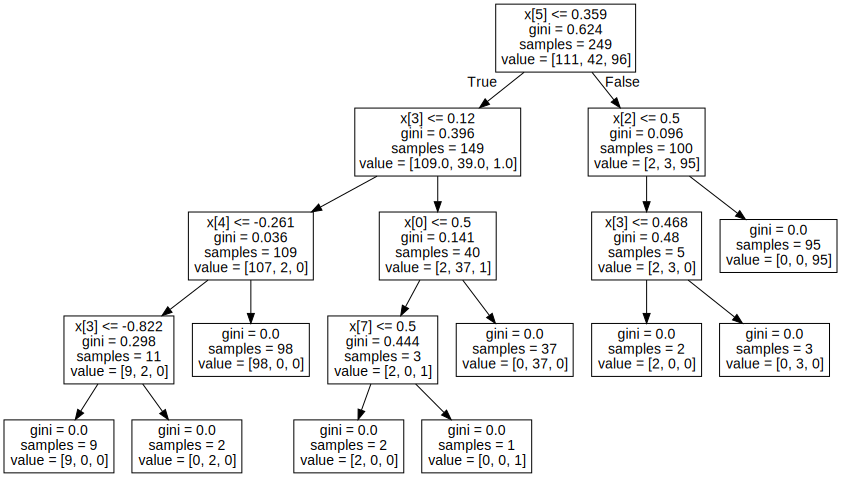

In [ ]:
# resposta da questão 3.2.a

import graphviz
from sklearn import tree

tree_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(tree_data)
graph

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

target_predicted = model.predict(predictors_test)

confusion_matrix = confusion_matrix(target_test, target_predicted)
print(confusion_matrix)



[[35  0  0]
 [ 4 22  0]
 [ 0  0 23]]


**b.** Acurácia

Calcule a **acurácia** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui uma acurácia de approx. 96% (sua acurácia pode não ser igual).

In [ ]:
# resposta da questão 3.2.b

from sklearn.metrics import accuracy_score

acuracia = accuracy_score(target_test, target_predicted)
print(acuracia)


0.9523809523809523


## 4\. Predição  

### **4.1. Novo penguim**

Qual a espécie de um penguim com as seguintes características:


| island | bill_length_mm | bill_depth_mm | flipper_length_mm | body_mass_g | sex |
| --- | --- | --- | --- | --- | --- |
| Biscoe | 38.2 | 18.1 | 185.0 | 3950.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2. A ordem dos atributos importa, deve ser a mesma usada na modelagem.

> **Nota:** Como referência eu obtive **adelie** como espécie predita (a sua predição pode não ser igual).

In [ ]:
data.head(1)

,species,island_Dream_nom,island_Torgersen_nom,island_Biscoe_nom,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std,sex_female,sex_male
0,Adelie,0,1,0,-0.894695,0.779559,-1.424608,-0.567621,0,1


In [ ]:
# resposta da questão 4.1

bill_length_mm = ((38.2 - penguim['bill_length_mm'].mean()) / penguim['bill_length_mm'].std())
bill_depth_mm = ((18.1 - penguim['bill_depth_mm'].mean()) / penguim['bill_depth_mm'].std())
flipper_length_mm = ((185 - penguim['flipper_length_mm'].mean()) / penguim['flipper_length_mm'].std())
body_mass_g = ((3950 - penguim['body_mass_g'].mean()) / penguim['body_mass_g'].std())

pinguim = np.array([0,0,1, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, 0, 1])

In [ ]:
especie = model.predict(pinguim.reshape(1, -1))

print(especie)

['Adelie']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


---